In [767]:
import numpy as np
from scipy.stats import norm 
import matplotlib as mpl
import matplotlib.pyplot as plt

Exercise1

In [2]:
u = 2
su = 1
vp = 3
sp = 1

In [3]:
v = np.arange(0.01, 5, 0.01)

In [4]:
puv = norm.pdf(u, v**2, su)
pv = norm.pdf(v, vp, sp)
numer = puv * pv
denom = np.sum(numer * 0.01) # 分母＝分子をvで積分
pvu = numer / denom

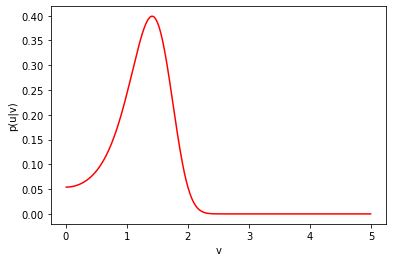

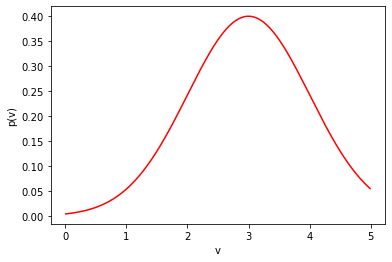

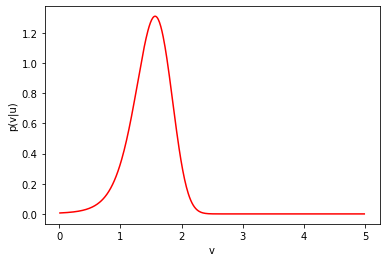

In [5]:
plt.plot(v, puv, color='r')
plt.xlabel('v')
plt.ylabel('p(u|v)')
plt.show()

plt.plot(v, pv, color='r')
plt.xlabel('v')
plt.ylabel('p(v)')
plt.show()

plt.plot(v, pvu, color='r')
plt.xlabel('v')
plt.ylabel('p(v|u)')
plt.show()

Exercise2

In [7]:
U = 2
SU = 1
VP = 3
SP = 1
V = np.arange(0.01, 5, 0.01)

In [8]:
phi = list(range(500))
phi[0] = VP
for i in range(1, 500):
    phi[i] = phi[i-1] + 0.01 * ((VP - phi[i-1]) / SP + (U - phi[i-1] ** 2) / SU * (2 * phi[i-1]))

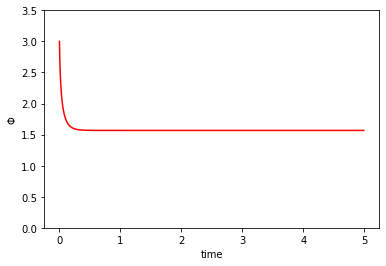

In [9]:
plt.plot(np.arange(0, 5, 0.01), phi, color='r')
plt.ylim(0, 3.5)
plt.xlabel('time')
plt.ylabel('Φ')
plt.show()

Exercise3

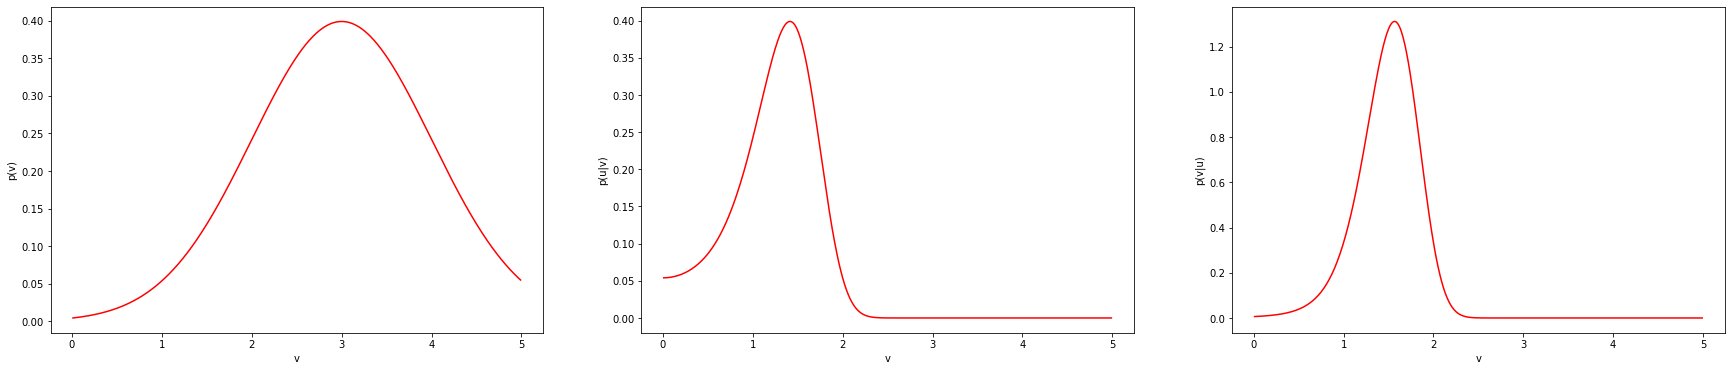

In [846]:
# 初期化
U = 2
SU = 1
VP = 3
SP = 1
V = np.arange(0.01, 5, 0.01)

puv = norm.pdf(U, V**2, SU)
pv = norm.pdf(V, VP, SP)
numer = puv * pv
denom = np.sum(numer * 0.01) # 分母＝分子をvで積分
pvu = numer / denom

plt.figure(1, figsize=(30, 6))
plt.subplot(1, 3, 1)
plt.plot(V, pv, color='r')
plt.xlabel('v')
plt.ylabel('p(v)')
plt.subplot(1, 3, 2)
plt.plot(V, puv, color='r')
plt.xlabel('v')
plt.ylabel('p(u|v)')
plt.subplot(1, 3, 3)
plt.plot(V, pvu, color='r')
plt.xlabel('v')
plt.ylabel('p(v|u)')
plt.show()

phi = list(range(500))
phi[0] = VP
ep = list(range(500))
ep[0] = (phi[0]- np.argmax(pvu)/100) / SP 
eu = list(range(500))
eu[0] = (U - np.argmax(pvu)/100**2) / SU

1.4142135623731082
1
1


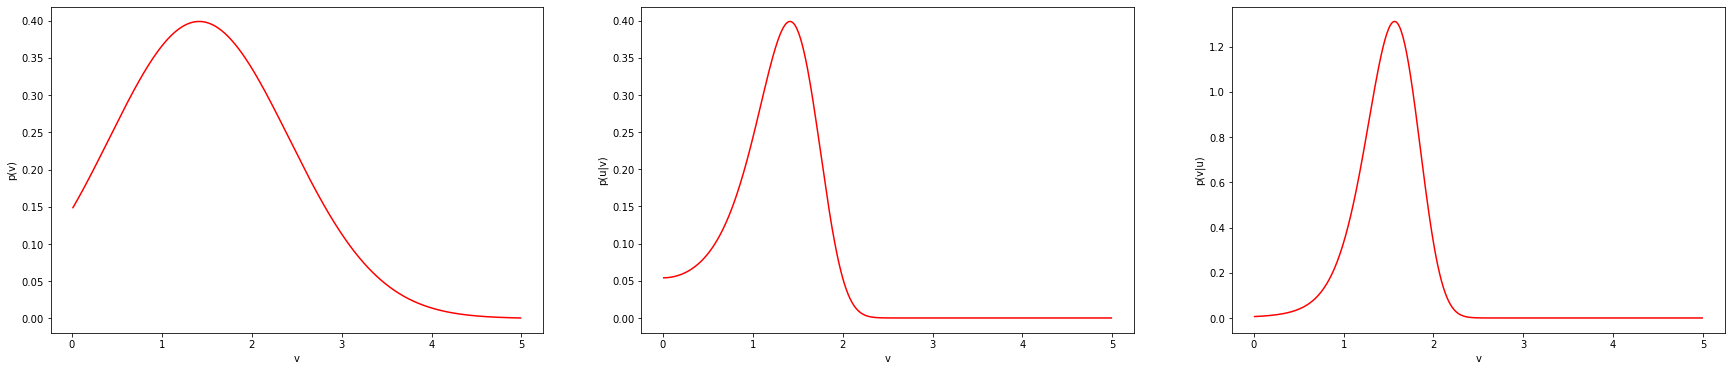

In [844]:
for i in range(1, 5000):
    # 推測
    for i in range(1, 500):
        phi[i] = phi[i-1] + 0.01 * (-ep[i-1] + eu[i-1] * (2 * phi[i-1]))
        ep[i] = ep[i-1] + 0.01 * (phi[i-1] - VP - SP * ep[i-1])
        eu[i] = eu[i-1] + 0.01 * (U - phi[i-1] ** 2 - SU * eu[i-1])
        
    phi[0] = phi[-1]
    ep[0] = ep[-1]
    eu[0] = eu[-1]
    
plt.plot(np.arange(0, 5, 0.01), phi, color='r')
plt.plot(np.arange(0, 5, 0.01), ep, color='b')
plt.plot(np.arange(0, 5, 0.01), eu, color='g')
plt.ylim(-2, 3.5)
plt.xlabel('time')
plt.ylabel('Φ')
plt.show()
    
    # 学習
    VP = VP + ep[-1] * 0.01
    SP = max(SP + 1/2 * (ep[-1]**2 - 1/SP), 1)
    SU = max(SU + 1/2 * (eu[-1]**2 - 1/SU), 1) 
print(VP)
print(SP)
print(SU)

pv = norm.pdf(V, VP, SP)
puv = norm.pdf(U, V**2, SU)

plt.figure(1, figsize=(30, 6))
plt.subplot(1, 3, 1),
plt.plot(v, pv, color='r')
plt.xlabel('v')
plt.ylabel('p(v)')
plt.subplot(1, 3, 2)
plt.plot(v, puv, color='r')
plt.xlabel('v')
plt.ylabel('p(u|v)')
plt.subplot(1, 3, 3)
plt.plot(v, pvu, color='r')
plt.xlabel('v')
plt.ylabel('p(v|u)')
plt.show()